In [1]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv("C://users/JunYoungPark/ai_study/data_files/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
# 결측값 확인
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
# dtype 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# 불필요한 columns 삭제
df = df.drop(columns=['id', 'date', 'zipcode'])

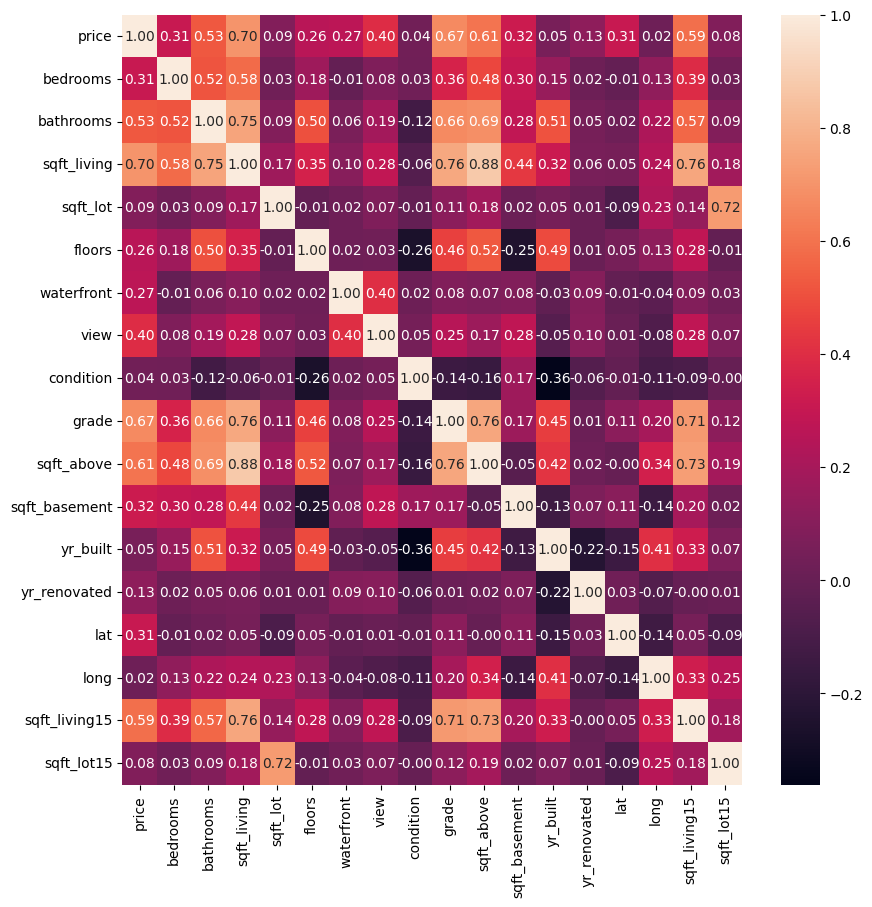

In [5]:
# corr 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [6]:
# X, y 나누기
X = df.drop(columns=['price'])
y = df['price']

In [7]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# 로그 변환 (정규 분포화)
import numpy as np
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [10]:
# 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.1),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(1)  # 출력층
])

In [11]:
# 모델 컴파일
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss=Huber(), metrics=['mae'])

In [12]:
# Early Stopping 설정
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [13]:
# 모델 학습
history = model.fit(X_train, y_train_log, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
433/433 [==============================] - 4s 5ms/step - loss: 11.0895 - mae: 11.5894 - val_loss: 8.8070 - val_mae: 9.3067
Epoch 2/100
433/433 [==============================] - 2s 5ms/step - loss: 4.2696 - mae: 4.7466 - val_loss: 0.4144 - val_mae: 0.7876
Epoch 3/100
433/433 [==============================] - 2s 4ms/step - loss: 0.8726 - mae: 1.2869 - val_loss: 0.1525 - val_mae: 0.4403
Epoch 4/100
433/433 [==============================] - 2s 4ms/step - loss: 0.6945 - mae: 1.0921 - val_loss: 0.0927 - val_mae: 0.3299
Epoch 5/100
433/433 [==============================] - 2s 4ms/step - loss: 0.6194 - mae: 1.0115 - val_loss: 0.0816 - val_mae: 0.3087
Epoch 6/100
433/433 [==============================] - 2s 4ms/step - loss: 0.5655 - mae: 0.9512 - val_loss: 0.0877 - val_mae: 0.3294
Epoch 7/100
433/433 [==============================] - 2s 4ms/step - loss: 0.5297 - mae: 0.9115 - val_loss: 0.0670 - val_mae: 0.2855
Epoch 8/100
433/433 [==============================] - 2s 4ms/step 

In [14]:
# 모델 평가
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # 로그 변환 복원

136/136 [==============================] - 0s 2ms/step


In [15]:
# DataFrame으로 변환하여 비교
df_compare = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.flatten()})

# 처음 5개 샘플만 출력
print(df_compare.head(5))

      Actual     Predicted
0   365000.0  3.593237e+05
1   865000.0  8.872699e+05
2  1038000.0  1.213225e+06
3  1490000.0  2.115692e+06
4   711000.0  6.662228e+05


In [16]:
# 성능 평가
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 79108.33
R² Score: 0.8157


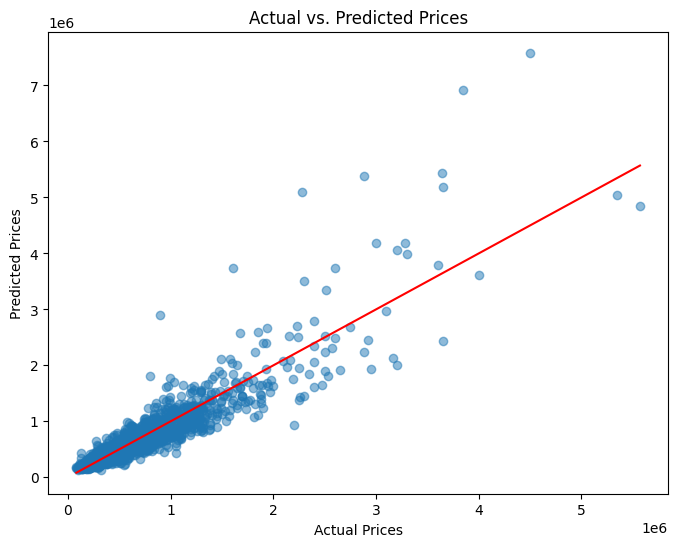

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="-")  # 대각선 (완벽한 예측)
plt.show()